<a href="https://colab.research.google.com/github/jakkapongz/hotel-reviews-sentiment-analysis/blob/main/hotel_reviews_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

## Install Libraries




In [1]:
!pip install git+https://github.com/jakkapongz/thai2transformers.git@master
!pip install pythainlp wordcloud

!pip list

!pip freeze

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 76.0 MB/s eta 0:00:00
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21

## Mount Google Drive

In [27]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)
# SET PATH TO DATA FOLDER
path= "/content/drive/Shareddrives/EGIT697_THEMATIC"

Mounted at /content/drive/


In [28]:
!python --version

Python 3.10.12


## Data Preparation

,property_id,review_id,hotel_name,rating,label,token_length,review_text,review_tokens
0,302577,2480789,Saichol GrandView,9.7,1,410,ผมเลือกพักที่แพสายชล รีสอร์ท เพราะได้รับการแนะ...,ผม เลือก พัก ที่ แพ สาย ชล รีสอร์ท เพราะ ได้รั...
1,237194,447658048,Chivapuri Beach Resort (SHA Extra Plus),8.0,1,394,รีวิวห้องสุพีเรียร์ บรรยากาศ: วิวทะเลสวยงาม ม...,รีวิว ห้อง สุ พี เรียร์ บรรยากาศ วิว ทะเล สวยง...
2,109169,362459238,Chatrium Hotel Riverside Bangkok (SHA Extra Plus),10.0,1,386,ที่จอดรถชั้นใต้ดินมีไฟสีออกส้มเลยดูค่อนข้างมืด...,ที่จอดรถ ชั้นใต้ดิน มี ไฟ สี ออก ส้ม เลย ดู ค่...
3,19855171,510816839,Sirin Hotel & Resident (SHA Extra Plus),8.0,1,386,ที่พักในขอนแก่นคืนนี้ จองผ่านอโกด้า ได้ในราคา ...,ที่พัก ใน ขอนแก่น คืนนี้ จอง ผ่า นอ โก ด้า ได้...
4,400378,279748565,Baan Na Khon Hotel,10.0,1,383,แฟนต้องเดินทางมาดูงานที่นครศรีธรรมราช 3 วัน เล...,แฟน ต้อง เดินทาง มา ดูงาน ที่ นครศรีธรรมราช 3 ...
...,...,...,...,...,...,...,...,...
7495,409353,8319287,Gecko Lipe Resort,9.0,1,61,ที่พักเป็นลักษณะคล้ายกระท่อม ไม่มีแอร์ มีมุ้งใ...,ที่พัก เป็น ลักษณะ คล้าย กระท่อม ไม่ มี แอร์ ม...
7496,108844,9895967,Tri Trang Beach Resort,10.0,1,61,ชอบที่นี้กลับมา2ครั้งแต่ครั้งนี้ชอบวิวความสะอา...,ชอบ ที่ นี้ กลับมา 2 ครั้ง แต่ ครั้งนี้ ชอบ วิ...
7497,446396,10359789,Ayothaya Riverside House,8.7,1,61,ที่พักน่ารัก ติดริมแม่น้ำ เหมือนเข้าพักบ้านญาต...,ที่พัก น่ารัก ติด ริมแม่น้ำ เหมือน เข้า พัก บ้...
7498,734875,10981013,Chandra Varin Hometel,10.0,1,61,ไปเชียงคานมาหลายรอบ พัก Home stay มาหลายที่แล้...,ไป เชียงคาน มา หลาย รอบ พัก homestay มา หลาย ท...


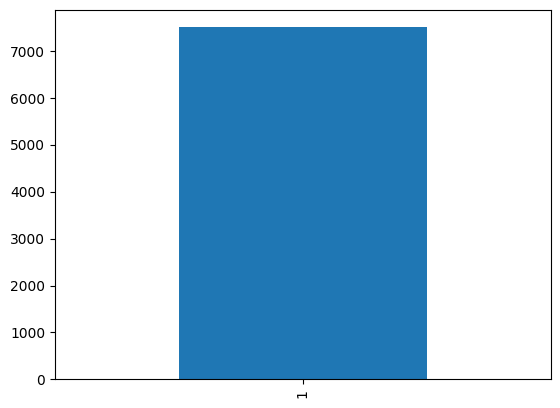

In [29]:
import pandas as pd
import numpy as np

all_tsv_df = pd.read_csv(path + '/7500_good_longest_token_more_than_8_03082023 2.tsv', delimiter='\t')

all_tsv_df['label'].value_counts().plot.bar()

all_tsv_df

# all_df = pd.read_pickle(path + '/10000_good_bad_reviews_no_gap_02012023.pkl')

# all_df['label'].value_counts().plot.bar()

# all_df

# **Feature Extraction Method**


In [30]:
import tensorflow as tf
import torch
import gc
import copy

# check GPU available?
torch.cuda.is_available()

False

## **Wangchanberta** (Monolingual Model)

In [54]:
from transformers import (AutoTokenizer, AutoModel,AutoConfig, pipeline, AutoModelForSequenceClassification)

# active GPU
# device = torch.device("cuda")
# torch.set_default_tensor_type('torch.cuda.FloatTensor')

device = torch.device("cpu")
# model loading
wangchan_tokenizer = AutoTokenizer.from_pretrained(f'airesearch/wangchanberta-base-att-spm-uncased', output_hidden_states=True)
wangchan_model = AutoModel.from_pretrained(f'airesearch/wangchanberta-base-att-spm-uncased', output_hidden_states=True)
wangchan_model = wangchan_model.to(device)
print(wangchan_model.config)

CamembertConfig {
  "_name_or_path": "airesearch/wangchanberta-base-att-spm-uncased",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "camembert",
  "num_attention_head": 12,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 25005
}



In [56]:
def adjust_encoded_input_wangchan(encoded_input):

  # delete first and last separator token and splits to 414 tokens
  input_ids_chunks = list(encoded_input['input_ids'][0][1:-1].split(414))
  attention_mask_chunks = list(encoded_input['attention_mask'][0][1:-1].split(414))

  for i in range(len(input_ids_chunks)):

    # add 5 to the first and 6 to last element tonsor padding len to 512 for transformer model
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], torch.Tensor([6, 5]).long() ])
    # shifting 6 5
    input_ids_chunks[i] = torch.roll(input_ids_chunks[i], 1, 0)

    # padding len to 416 for transformer model
    pad_len = 416 - input_ids_chunks[i].shape[0]

    # 1 token represents padding <pad>
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], torch.Tensor([1] * pad_len).long()])

    if len(attention_mask_chunks[i]) == 414:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], torch.Tensor([1] * 2).long()])
    else:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], torch.Tensor([1] * 2).long()])
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], torch.Tensor([0] * (pad_len)).long()])

  input_ids = torch.stack(input_ids_chunks)
  attention_mask = torch.stack(attention_mask_chunks)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }
  return input_dict

adjust_encoded_input_wangchan method ที่ช่วยจัดการ split word tokens ที่ยาวเกินให้มีขนาด 416 ส่วนที่เหลือจะถูกทำการ padding ด้วย 1 ในฝั่งของ wangchanberta

In [57]:
# EXAMPLE
text = "จากก้าวแรกที่ผ่านประตูทางเข้า ด้วยกลิ่นหอมของเครื่องหอมที่จัดไว้ของทางโรงแรมทำให้เกิดความรู้สึกของการต้อนรับที่อบอุ่นของเจ้าของโรงแรม ที่ไม่ได้เกิดจากบุคคล ผสมผสานกับการเอาใจใส่ของพนักงานที่ได้รับการฝึกอบรมมาอย่างดีทำให้รับรู้ได้ถึงคำว่าบริการ 5 ดาวในโรงแรมขนาดเล็ก ห้องพักที่เข้าพักเป็นห้องชั้นล่าง สำหรับตึก 2 ชั้นใกล้สระว่ายน้ำขนาดเล็ก ทำให้สะดวกในการเล่นน้ำในสระ ประกอบกับการออกแบบในสไตล์ Indochina ที่พบเห็นไม่บ่อยครั้งนัก ทำให้การพักผ่อนในครั้งนี้ นับเป็นการพักผ่อนที่สมบูรณ์แบบอีกครั้งหนึ่ง"

encoded_input = wangchan_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_wangchan(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[    5,    10,    32, 24588,  9180,   816,  5671,    10,    45,  8270,
          10998,  1741,    12,   375,   130,    16,    75,  1595,  1519,   827,
             16, 12297,    12,  4420,    16,   554,  1595,    10,  4338,  2483,
            918,    10,  8325,  1052,  7830, 11809,  1375, 13015,    26,  1679,
            116,  3524,  4568,  1169,   803,    10,    65,    10,   925,    20,
           1595,  3068,    10,  4987,    12, 18433,    17,   580,  9590,  1584,
           2358,    10,    47,  3083,   991,    40, 20648,  3068,  1675, 10291,
          10964,    20,  4972,    10,  3938,  3741,    20,  2070,    10,     3,
            496,  2397, 20611,    10,    12,  6236,    51,  4926,   215,    10,
           8994,  3125,  2347,    10,  3345,    24,  3125,    12,  5750,   457,
            183,     6,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,   

In [73]:
def extract_last_four_with_wangchan(input_text, feature_extractor):

  encoded_input = wangchan_tokenizer(input_text, return_tensors='pt').to(device)
  encoded_input = adjust_encoded_input_wangchan(encoded_input)
  # _, _, hidden_states = feature_extractor(**encoded_input)
  model_output = feature_extractor(**encoded_input)

  # use only last 4 layers
  last_four_layers = [model_output.hidden_states[i] for i in (-1, -2, -3, -4)]

  # concat last 4 layers vectors then calculate mean between vectors
  cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
  cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze()

  # if document only has 1 batch, no need to sum vector
  if cat_sentence_embedding.shape[0] != 3072:

    doc_embedding = torch.sum(cat_sentence_embedding, dim=0)
  else:
    doc_embedding = copy.copy(cat_sentence_embedding)

  return doc_embedding.cpu().detach().numpy().astype('float64')

We can use the outputs of WangchanBERTa (or any transformer-based models) as document vectors as an example by [BramVanroy](https://github.com/BramVanroy/bert-for-inference/blob/master/introduction-to-bert.ipynb).

![](https://github.com/BramVanroy/bert-for-inference/raw/ab7c57d6e7c79faf83ac0f9b6595c4b3d660c43c/img/bert-feature-extraction-contextualized-embeddings.png)

In [74]:
text = "จากก้าวแรกที่ผ่านประตูทางเข้า ด้วยกลิ่นหอมของเครื่องหอมที่จัดไว้ของทางโรงแรมทำให้เกิดความรู้สึกของการต้อนรับที่อบอุ่นของเจ้าของโรงแรม ที่ไม่ได้เกิดจากบุคคล ผสมผสานกับการเอาใจใส่ของพนักงานที่ได้รับการฝึกอบรมมาอย่างดีทำให้รับรู้ได้ถึงคำว่าบริการ 5 ดาวในโรงแรมขนาดเล็ก ห้องพักที่เข้าพักเป็นห้องชั้นล่าง สำหรับตึก 2 ชั้นใกล้สระว่ายน้ำขนาดเล็ก ทำให้สะดวกในการเล่นน้ำในสระ ประกอบกับการออกแบบในสไตล์ Indochina ที่พบเห็นไม่บ่อยครั้งนัก ทำให้การพักผ่อนในครั้งนี้ นับเป็นการพักผ่อนที่สมบูรณ์แบบอีกครั้งหนึ่ง"

# print(wangchan_model)

t_2 = extract_last_four_with_wangchan(text, wangchan_model)
t_2

<class 'tuple'>


array([ 1.06466317, -0.03382202,  0.66002458, ..., -0.03905698,
        0.01384894,  0.01007268])

In [75]:
len(t_2)

3072

## **Bert Model for Multilingual**

In [76]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification

device = torch.device("cpu")
# active GPU
# device = torch.device("cuda")
# torch.set_default_tensor_type('torch.cuda.FloatTensor')

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', output_hidden_states=True)
bert_model = BertModel.from_pretrained("bert-base-multilingual-cased", output_hidden_states=True)
bert_model = bert_model.to(device)
# bert_class = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased")

In [77]:
a = torch.Tensor([102, 101]).long()
c = torch.Tensor([1] * 2).long()
def adjust_encoded_input(encoded_input):

  # delete first and last separator token and splits to 510 tokens
  input_ids_chunks = list(encoded_input['input_ids'][0][1:-1].split(510))
  attention_mask_chunks = list(encoded_input['attention_mask'][0][1:-1].split(510))

  for i in range(len(input_ids_chunks)):

    # add 101 to the first and 102 to last element tonsor padding len to 512 for transformer model
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], a ])
    # shifting 101 102
    input_ids_chunks[i] = torch.roll(input_ids_chunks[i], 1, 0)

    # padding len to 512 for transformer model
    pad_len = 512 - input_ids_chunks[i].shape[0]
    b = torch.Tensor([0] * pad_len).long()

    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], b])

    if len(attention_mask_chunks[i]) == 510:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
    else:
      d = torch.Tensor([0] * (pad_len)).long()
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], d])

  input_ids = torch.stack(input_ids_chunks)
  attention_mask = torch.stack(attention_mask_chunks)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }

  return input_dict

method ที่ช่วยจัดการ split word tokens ที่ยาวเกินให้มีขนาด 512 ส่วนที่เหลือจะถูกทำการ padding ด้วย 0 ในฝั่งของ bert

In [78]:
text = "จากก้าวแรกที่ผ่านประตูทางเข้า ด้วยกลิ่นหอมของเครื่องหอมที่จัดไว้ของทางโรงแรมทำให้เกิดความรู้สึกของการต้อนรับที่อบอุ่นของเจ้าของโรงแรม ที่ไม่ได้เกิดจากบุคคล ผสมผสานกับการเอาใจใส่ของพนักงานที่ได้รับการฝึกอบรมมาอย่างดีทำให้รับรู้ได้ถึงคำว่าบริการ 5 ดาวในโรงแรมขนาดเล็ก ห้องพักที่เข้าพักเป็นห้องชั้นล่าง สำหรับตึก 2 ชั้นใกล้สระว่ายน้ำขนาดเล็ก ทำให้สะดวกในการเล่นน้ำในสระ ประกอบกับการออกแบบในสไตล์ Indochina ที่พบเห็นไม่บ่อยครั้งนัก ทำให้การพักผ่อนในครั้งนี้ นับเป็นการพักผ่อนที่สมบูรณ์แบบอีกครั้งหนึ่ง"

encoded_input = bert_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[   101,  85706,  18427,  43102,  31287, 111432,  22765,  18427,  18203,
          111420,  38999,  16000,  49292,  22765,  22598,  30011,  38468,  37022,
           65979, 111431,  80814,  43102,    100,  53470, 111435,  17405,  31904,
          111435,  81831, 111431, 100631,  46856, 101983,  49097,  53936,  31256,
           31256,  20507,   1420,  28767,  17405, 111420,  28767,  44121,  47260,
           53123, 111431,  33178,  17344, 111434,  46856, 111434,  28767,  31904,
           80814,  31142,  39901,  16000,  69365,  19197,  44121,  18203, 111435,
           81831,  22765, 102269,  53123, 111421, 111428,  18427, 108723,  65266,
           66845, 100145,  38999,  19197,  57209,  37022,  55593, 111434, 111424,
           35933,  22765, 102269,  22765,  38468,  35933, 111435,  81831, 111419,
          111428,  19197,  31256, 110429,  49097,  22765, 109453,  52780,    126,
            1412,  65530,  75890, 111433,  22765,  19197, 111432,  65266,  80814,
           62904

In [82]:
def extract_last_four_with_bert(input_text, feature_extractor):
  encoded_input = bert_tokenizer(input_text, return_tensors='pt').to(device)
  encoded_input = adjust_encoded_input_wangchan(encoded_input)
  # hidden_states = feature_extractor(**encoded_input)[0]
  # _, _, hidden_states = feature_extractor(**encoded_input)
  model_output = feature_extractor(**encoded_input)

  # FOR MEAN CALCULATION BETWEEN TENSOR DIMENSION

  last_four_layers = [model_output.hidden_states[i] for i in (-1, -2, -3, -4)]

  cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
  cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze()

  if cat_sentence_embedding.shape[0] != 3072:

    doc_embedding = torch.sum(cat_sentence_embedding, dim=0)
  else:
    doc_embedding = copy.copy(cat_sentence_embedding)

  return doc_embedding.cpu().detach().numpy().astype('float64')

In [83]:
text = "จากก้าวแรกที่ผ่านประตูทางเข้า ด้วยกลิ่นหอมของเครื่องหอมที่จัดไว้ของทางโรงแรมทำให้เกิดความรู้สึกของการต้อนรับที่อบอุ่นของเจ้าของโรงแรม ที่ไม่ได้เกิดจากบุคคล ผสมผสานกับการเอาใจใส่ของพนักงานที่ได้รับการฝึกอบรมมาอย่างดีทำให้รับรู้ได้ถึงคำว่าบริการ 5 ดาวในโรงแรมขนาดเล็ก ห้องพักที่เข้าพักเป็นห้องชั้นล่าง สำหรับตึก 2 ชั้นใกล้สระว่ายน้ำขนาดเล็ก ทำให้สะดวกในการเล่นน้ำในสระ ประกอบกับการออกแบบในสไตล์ Indochina ที่พบเห็นไม่บ่อยครั้งนัก ทำให้การพักผ่อนในครั้งนี้ นับเป็นการพักผ่อนที่สมบูรณ์แบบอีกครั้งหนึ่ง"

t_2 = extract_last_four_with_bert(text, bert_model)
t_2

array([-0.03431556, -0.42022917,  0.42583099, ...,  1.26677394,
        0.04521934, -0.15221226])

In [84]:
len(t_2)

3072

## **XLM-RoberTa Model for Multilingual**

In [85]:
from transformers import AutoTokenizer, XLMRobertaModel

device = torch.device("cpu")

xlmr_tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base", output_hidden_states=True)
xlmr_model = XLMRobertaModel.from_pretrained("xlm-roberta-base", output_hidden_states=True)
xlmr_model = xlmr_model.to(device)

In [86]:
a = torch.Tensor([102, 101]).long()
c = torch.Tensor([1] * 2).long()
def adjust_encoded_input_xlmr(encoded_input):

  # delete first and last separator token and splits to 510 tokens
  input_ids_chunks = list(encoded_input['input_ids'][0][1:-1].split(510))
  attention_mask_chunks = list(encoded_input['attention_mask'][0][1:-1].split(510))

  for i in range(len(input_ids_chunks)):

    # add 101 to the first and 102 to last element tonsor padding len to 512 for transformer model
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], a ])
    # shifting 101 102
    input_ids_chunks[i] = torch.roll(input_ids_chunks[i], 1, 0)

    # padding len to 512 for transformer model
    pad_len = 512 - input_ids_chunks[i].shape[0]
    b = torch.Tensor([0] * pad_len).long()

    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], b])

    if len(attention_mask_chunks[i]) == 510:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
    else:
      d = torch.Tensor([0] * (pad_len)).long()
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], d])

  input_ids = torch.stack(input_ids_chunks)
  attention_mask = torch.stack(attention_mask_chunks)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }

  return input_dict

In [87]:
# EXAMPLE
text = "จากก้าวแรกที่ผ่านประตูทางเข้า ด้วยกลิ่นหอมของเครื่องหอมที่จัดไว้ของทางโรงแรมทำให้เกิดความรู้สึกของการต้อนรับที่อบอุ่นของเจ้าของโรงแรม ที่ไม่ได้เกิดจากบุคคล ผสมผสานกับการเอาใจใส่ของพนักงานที่ได้รับการฝึกอบรมมาอย่างดีทำให้รับรู้ได้ถึงคำว่าบริการ 5 ดาวในโรงแรมขนาดเล็ก ห้องพักที่เข้าพักเป็นห้องชั้นล่าง สำหรับตึก 2 ชั้นใกล้สระว่ายน้ำขนาดเล็ก ทำให้สะดวกในการเล่นน้ำในสระ ประกอบกับการออกแบบในสไตล์ Indochina ที่พบเห็นไม่บ่อยครั้งนัก ทำให้การพักผ่อนในครั้งนี้ นับเป็นการพักผ่อนที่สมบูรณ์แบบอีกครั้งหนึ่ง"

encoded_input = xlmr_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_xlmr(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[   101,  11371, 100552,  21573,    699,  13801,  38196,   4436,   9373,
           25781,  88819,  68644,   1037,  16581,  68644,    699,  16491,  11407,
            1037,   4436,  29890, 164544, 119074,  63570, 118040,    699, 222353,
            1037,  72131,  29890,   5261,  12707, 134836,  40215,      6, 240232,
           71927,  17218,   6299,  17057,   1037,  38475, 212124,  69214,  88516,
            2131,   5943,   3641,  18729,   8448,  21268,   1547,   8959, 139295,
           31698,    190, 116082,   1201,  29890,  84656,      6,  66316,    699,
          145542,   1805,  27163,  26089, 145360,  19517, 171344,    116,  53067,
           44839, 167119,  84656,  32404,  62676,   1201, 114538,   5763,   1201,
          162714,      6,  36385,   2623, 152422,   1201,  69194,  93951,  42072,
            5261,  24006,  19575,   3379, 119615,  40480,  17448,  32404,   1834,
          127040,   1201, 108444,      6,  50460,  59193, 127040,    699,  89356,
            5938

In [88]:
def extract_last_four_with_xlmr(input_text, feature_extractor):
  encoded_input = xlmr_tokenizer(input_text, return_tensors='pt').to(device)
  encoded_input = adjust_encoded_input_wangchan(encoded_input)
  # hidden_states = feature_extractor(**encoded_input)[0]
  # _, _, hidden_states = feature_extractor(**encoded_input)
  model_output = feature_extractor(**encoded_input)

  # FOR MEAN CALCULATION BETWEEN TENSOR DIMENSION

  last_four_layers = [model_output.hidden_states[i] for i in (-1, -2, -3, -4)]

  cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
  cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze()

  if cat_sentence_embedding.shape[0] != 3072:

    doc_embedding = torch.sum(cat_sentence_embedding, dim=0)
  else:
    doc_embedding = copy.copy(cat_sentence_embedding)

  return doc_embedding.cpu().detach().numpy().astype('float64')

In [89]:
text = "จากก้าวแรกที่ผ่านประตูทางเข้า ด้วยกลิ่นหอมของเครื่องหอมที่จัดไว้ของทางโรงแรมทำให้เกิดความรู้สึกของการต้อนรับที่อบอุ่นของเจ้าของโรงแรม ที่ไม่ได้เกิดจากบุคคล ผสมผสานกับการเอาใจใส่ของพนักงานที่ได้รับการฝึกอบรมมาอย่างดีทำให้รับรู้ได้ถึงคำว่าบริการ 5 ดาวในโรงแรมขนาดเล็ก ห้องพักที่เข้าพักเป็นห้องชั้นล่าง สำหรับตึก 2 ชั้นใกล้สระว่ายน้ำขนาดเล็ก ทำให้สะดวกในการเล่นน้ำในสระ ประกอบกับการออกแบบในสไตล์ Indochina ที่พบเห็นไม่บ่อยครั้งนัก ทำให้การพักผ่อนในครั้งนี้ นับเป็นการพักผ่อนที่สมบูรณ์แบบอีกครั้งหนึ่ง"

t_2 = extract_last_four_with_xlmr(text, xlmr_model)
t_2

array([0.11252371, 0.06388053, 0.01829695, ..., 0.16430773, 0.06374867,
       0.00989079])

In [90]:
len(t_2)

3072

## Extract last four from data

In [ ]:
wangchan_vectors = []
bert_vectors = []
xlmr_vectors = []

for idx, row in all_tsv_df.iterrows():
  text = row['review_text']
  wangchan_vector = extract_last_four_with_wangchan(text, wangchan_model)
  bert_vector = extract_last_four_with_bert(text, bert_model)
  xlmr_vector = extract_last_four_with_xlmr(text, xlmr_model)
  wangchan_vectors.append(wangchan_vector)
  bert_vectors.append(bert_vector)
  xlmr_vectors.append(xlmr_vector)
  print(idx)

all_tsv_df['content_bert_vector'] = bert_vectors
all_tsv_df['content_wangchan_vector'] = wangchan_vectors
all_tsv_df['content_xlmr_vector'] = xlmr_vectors

all_tsv_df.to_pickle(path + "/7500_good_longest_token_more_than_8_03082023.tsv.pkl")

In [ ]:
pos_df = pd.read_pickle(path + '/5000_good_reviews_no_gap_02012023.pkl')

pos_df['label'].value_counts().plot.bar()

pos_df


In [ ]:
neg_df = pd.read_pickle(path + '/5000_bad_reviews_no_gap_02012023.pkl')

neg_df['label'].value_counts().plot.bar()

neg_df

In [ ]:
combined_df = neg_df.append(pos_df, ignore_index=True)

# # # combined_df = pos_df.append(neg_df, ignore_index=True)

combined_df.rename(columns = {'review_token':'review_tokens'}, inplace = True)
combined_df

combined_df.to_pickle(path + "/10000_good_bad_reviews_no_gap_02012023.pkl")

In [ ]:
# SAMPLE GOOD TEXT WANGCHAN
text = all_df.iloc[5]['review_text']

print(text + '\n')

encoded_input = wangchan_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_wangchan(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

In [ ]:
# SAMPLE BAD TEXT WANGCHAN
text = all_df.iloc[5002]['review_text']

print(text + '\n')

encoded_input = wangchan_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_wangchan(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

## PyThai NLP

### Pre-Processing

####Light Clean

In [ ]:
import string
import re
from pythainlp import word_tokenize
from pythainlp.corpus.common import thai_stopwords
from pythainlp import sent_tokenize, word_tokenize

thai_stopwords = list(thai_stopwords())

def text_process(text):

    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = final.translate(str.maketrans('','', string.punctuation))

    final = word_tokenize(final)
    final = " ".join(word for word in final)
    return final

all_df['review_tokens'] = all_df['review_text'].apply(text_process)
# all_df.head()

X = all_df[['review_tokens']]
y = all_df['label']

####Deep Clean

In [ ]:
import string
import re
from pythainlp import word_tokenize
from pythainlp.corpus.common import thai_stopwords
from pythainlp import sent_tokenize, word_tokenize
from thai2transformers import preprocess

thai_stopwords = list(thai_stopwords())

def text_process(text):

    t = preprocess.fix_html(text)
    t = preprocess.rm_brackets(t)
    t = preprocess.replace_newlines(t)
    t = preprocess.rm_useless_spaces(t)
    t = preprocess.replace_spaces(t)
    t = preprocess.replace_rep_after(t)

    tokens = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    tokens = tokens.translate(str.maketrans('','', string.punctuation))

    tokens = word_tokenize(tokens)
    tokens = preprocess.ungroup_emoji(tokens)
    tokens = preprocess.replace_wrep_post(tokens)

    final = " ".join(word for word in tokens)

    return final

all_df['deep_clean_review_tokens'] = all_df['review_text'].apply(text_process)
all_df.head()

deep_clean_X = all_df[['deep_clean_review_tokens']]
deep_clean_y = all_df['label']

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x:x.split(' '))

tfidf_vec = tfidf_vectorizer.fit_transform(X['review_tokens'])
tfidf_array = np.array(tfidf_vec.todense())

content_tfidf = []

for vec in tfidf_array:
  content_tfidf.append(vec)

all_df['content_tfidf_vector'] = content_tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x:x.split(' '))

tfidf_vec = tfidf_vectorizer.fit_transform(deep_clean_X['deep_clean_review_tokens'])
tfidf_array = np.array(tfidf_vec.todense())

content_tfidf = []

for vec in tfidf_array:
  content_tfidf.append(vec)

all_df['content_deep_clean_tfidf_vector'] = content_tfidf

### Bag Of Word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer=lambda x:x.split(' '))

bow_vec = count_vectorizer.fit_transform(X['review_tokens'])
bow_array = np.array(bow_vec.todense())

content_bow = []

for vec in bow_array:
  content_bow.append(vec)

all_df['content_bow_vector'] = content_bow


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer=lambda x:x.split(' '))

bow_vec = count_vectorizer.fit_transform(deep_clean_X['deep_clean_review_tokens'])
bow_array = np.array(bow_vec.todense())

content_bow = []

for vec in bow_array:
  content_bow.append(vec)

all_df['content_deep_clean_bow_vector'] = content_bow

In [ ]:
all_df.to_pickle(path + "/10000_good_bad_reviews_no_gap_02012023_completed.pkl")

# Word Cloud

## Good words

In [ ]:
import string
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from pythainlp.corpus.common import thai_stopwords

thai_stopwords = list(thai_stopwords())


df_pos = all_df[all_df['label'] == 'GOOD']
pos_word_all = " ".join(text for text in df_pos['deep_clean_review_tokens'])
# print(pos_word_all)
reg = r"[ก-๙a-zA-Z']+"
fp =  path + '/THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Bad words

In [ ]:
import string
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from pythainlp.corpus.common import thai_stopwords

thai_stopwords = list(thai_stopwords())


df_neg = all_df[all_df['label'] == 'BAD']
neg_word_all = " ".join(text for text in df_neg['deep_clean_review_tokens'])
# print(pos_word_all)
reg = r"[ก-๙a-zA-Z']+"
fp =  path + '/THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Predictive Model Running

In [ ]:
all_df.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
import matplotlib.pyplot as plt

In [ ]:
ks_selected_df = all_df

# train test spilt 70/30 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['label']), test_size=0.3, random_state=0)

task = {
    "ks_df": {
        'data': ks_df_train,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (multilingual)'
    },
    "kh_df": {
        'data': ks_df_train,
        'col': 'content_wangchan_vector',
        'language_model' : 'WangchanBERTa (monolingual)'
    },
    "xlmr_df": {
        'data': ks_df_train,
        'col': 'content_xlmr_vector',
        'language_model' : 'XML-RoBERTa (multilingual)'
    },
    "tfidf": {
        'data': ks_df_train,
        'col': 'content_tfidf_vector',
        'language_model' : 'TF-IDF'
    },
    "bow": {
        'data': ks_df_train,
        'col': 'content_bow_vector',
        'language_model' : 'Bag Of Word'
    },
    "deep_clean_tfidf": {
        'data': ks_df_train,
        'col': 'content_deep_clean_tfidf_vector',
        'language_model' : 'TF-IDF (Deep clean)'
    },
    "bow": {
        'data': ks_df_train,
        'col': 'content_deep_clean_bow_vector',
        'language_model' : 'Bag Of Word (Deep clean)'
    }

}

In [ ]:
ks_selected_df['label'].value_counts().plot.bar()

In [ ]:
is_manual = True

# loop data df
for i in task:

  col = task[i]['col']
  X = list(task[i]['data'][col])
  y = list(task[i]['data']['label'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['label'])

  max_num_iter = 1000

  if is_manual:

    logreg_model = LogisticRegression(max_iter=max_num_iter, random_state=0,multi_class='multinomial')
    logreg_model.fit(X, y)
    y_pred = logreg_model.predict(X_test)
    print(task[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')